In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.pipeline import Pipeline

import statsmodels.api as sm

import missingno as msno


pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000
pd.options.display.max_colwidth = 400

In [2]:
df = pd.read_csv('data/NYC0809_with_income.csv')

In [3]:
df.head()

,join_count,target_fid,join_count_1,target_fid_1,field1,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,juris_desc,jurisdiction_code,parks_nm,hadevelopt,housing_psa,x_coord_cd,y_coord_cd,susp_age_group,susp_race,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex,borocode,boroname,countyfips,ntacode,ntaname,shape_leng,neighborhood,zipcode_x,bldgzip,po_name,population,area,state_x,county,st_fips,cty_fips,url,zipcodes,state_y,zipcode_y,number_of_returns,adjusted_gross_income_(agi),avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
0,0,1,0,1,117,686917220,2018-04-18,16:58:00,2019-04-18,17:01:00,88.0,4/18/2019 0:00:00,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,OTHER,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,U,NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,0,2,157,444236774,2018-07-13,23:00:00,NaN,NaN,42.0,4/12/2019 0:00:00,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,NaN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-64,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,0,3,235,864262100,2018-03-27,22:00:00,2019-04-01,08:00:00,94.0,4/1/2019 0:00:00,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,U,NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F,NaN,NaN,NaN,NaN,NaN,NaN,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,4,0,4,313,383311341,2018-11-14,18:00:00,NaN,NaN,105.0,3/22/2019 0:00:00,116,SEX CRIMES,168.0,SODOMY 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,UNKNOWN,BLACK,U,NaN,NaN,NaN,NaN,PATROL BORO QUEENS SOUTH,NaN,<18,BLACK,F,NaN,NaN,NaN,NaN,NaN,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,0,5,429,555889431,2018-11-12,08:00:00,2019-03-28,08:00:00,61.0,3/28/2019 0:00:00,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,BROOKLYN,REAR OF,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,M,NaN,NaN,NaN,NaN,NaN,NaN,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['join_count', 'target_fid', 'join_count_1', 'target_fid_1', 'field1',
       'cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex', 'borocode', 'boroname',
       'countyfips', 'ntacode', 'ntaname', 'shape_leng', 'neighborhood',
       'zipcode_x', 'bldgzip', 'po_name', 'population', 'area', 'state_x',
       'county', 'st_fips', 'cty_fips', 'url', 'zipcodes', 'state_y',
       'zipcode_y', 'number_of_returns', 'adjusted_gross_income_(agi)',
       'avg_agi', 'number_of_returns_with_total_inc

In [5]:
df.drop(columns=['join_count', 'target_fid', 'join_count_1', 'target_fid_1', 'field1', 'cmplnt_to_dt','cmplnt_to_tm'], inplace=True)


In [6]:
df.drop(columns=['crm_atpt_cptd_cd','loc_of_occur_desc', 'juris_desc', 'parks_nm', 'hadevelopt', 'housing_psa'], inplace=True)


In [7]:
df.drop(columns=['x_coord_cd', 'y_coord_cd','transit_district','station_name', 'borocode', 'boroname'], inplace=True)


In [8]:
df.drop(columns=['countyfips', 'ntacode', 'ntaname', 'shape_leng', 'neighborhood','bldgzip', 'po_name'], inplace=True)


In [9]:
df.drop(columns=['zipcode_x', 'zipcode_y','number_of_returns_with_taxable_income','number_of_returns'], inplace=True)


In [10]:
df.drop(columns=['number_of_returns_with_total_income', 'addr_pct_cd', 'jurisdiction_code', 'lat_lon'], inplace=True)


In [11]:
df.drop(columns=['state_x','st_fips', 'cty_fips', 'url','state_y'], inplace=True)

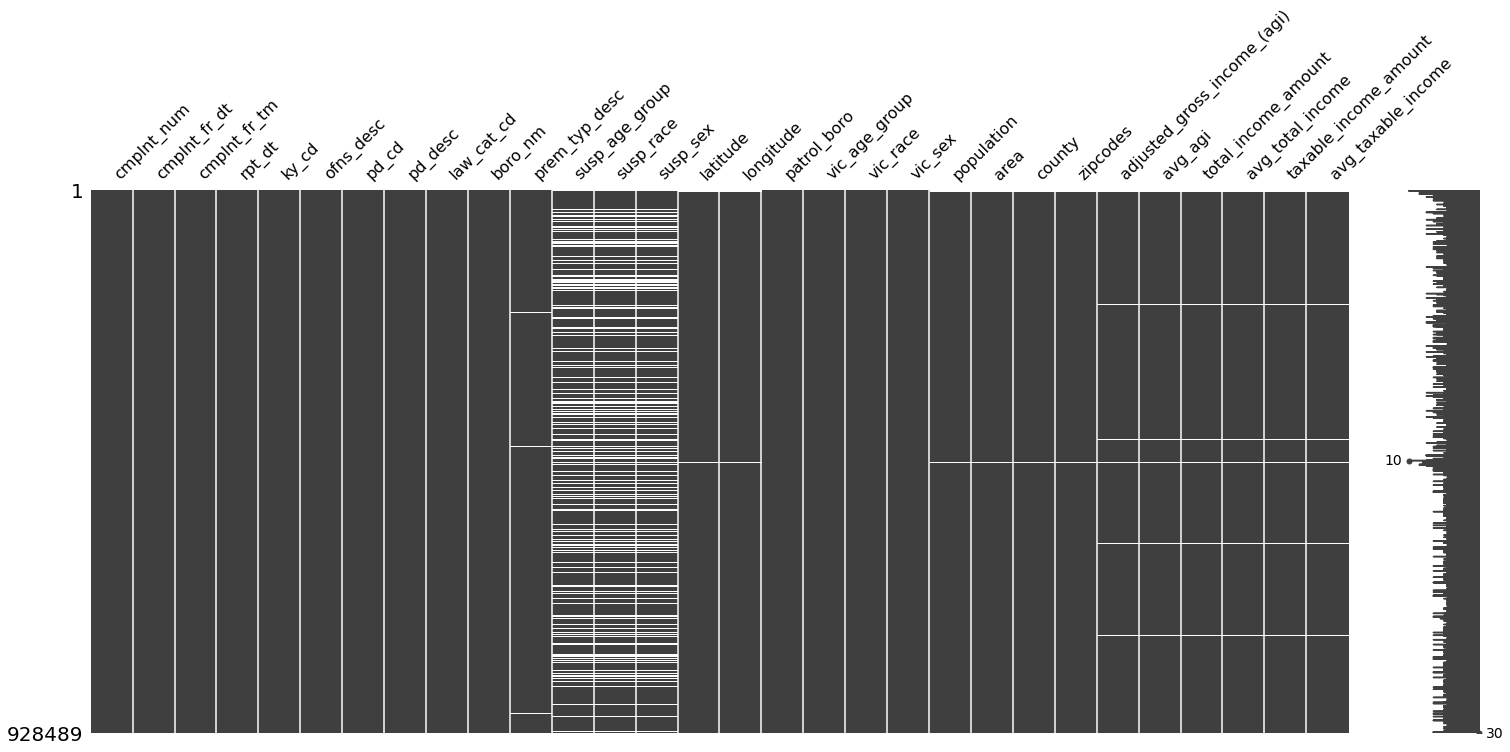

In [12]:
msno.matrix(df);

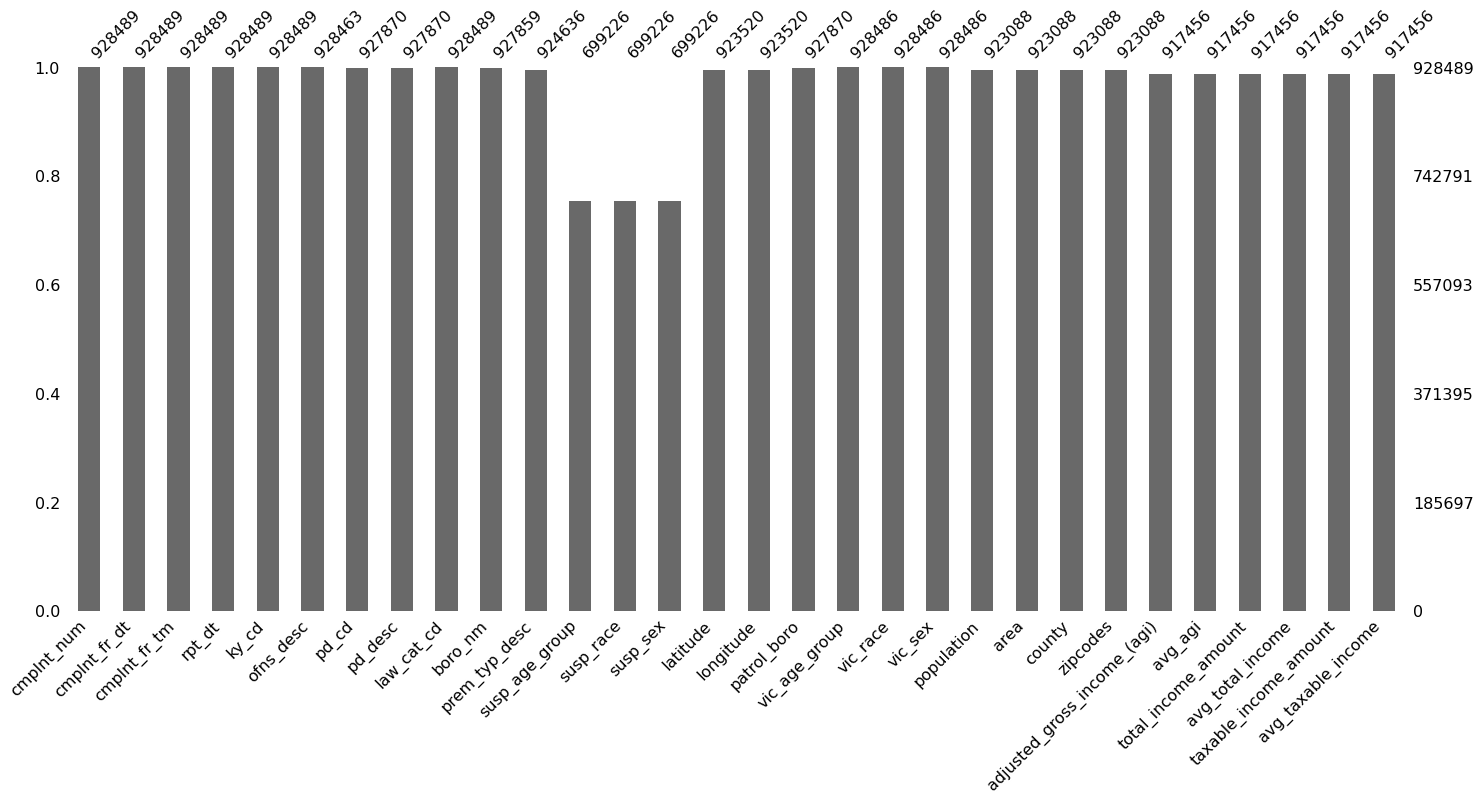

In [13]:
msno.bar(df);

In [14]:
df.replace({'susp_sex': np.nan}, {'susp_sex': 'U'}, inplace = True)

In [15]:
df.replace({'susp_race': np.nan}, {'susp_race': 'unknown'}, inplace = True)

In [16]:
df.replace({'susp_age_group': np.nan}, {'susp_age_group': '0'}, inplace = True)

In [17]:
df.replace({'vic_age_group': np.nan}, {'vic_age_group': '0'}, inplace = True)
df.replace({'vic_race': np.nan}, {'vic_race': 'unknown'}, inplace = True)
df.replace({'vic_sex': np.nan}, {'vic_sex': 'u'}, inplace = True)

In [18]:
df['vic_age_group'] = df['vic_age_group'].replace('936','0')
df['vic_age_group'] = df['vic_age_group'].replace('-2','0')
df['vic_age_group'] = df['vic_age_group'].replace('-56','0')
df['vic_age_group'] = df['vic_age_group'].replace('-974','0')
df['vic_age_group'] = df['vic_age_group'].replace('-970','0')
df['vic_age_group'] = df['vic_age_group'].replace('929','0')
df['vic_age_group'] = df['vic_age_group'].replace('-956','0')
df['vic_age_group'] = df['vic_age_group'].replace('-967','0')
df['vic_age_group'] = df['vic_age_group'].replace('-948','0')
df['vic_age_group'] = df['vic_age_group'].replace('951','0')
df['vic_age_group'] = df['vic_age_group'].replace('-954','0')
df['vic_age_group'] = df['vic_age_group'].replace('-67','0')
df['vic_age_group'] = df['vic_age_group'].replace('-952','0')
df['vic_age_group'] = df['vic_age_group'].replace('-943','0')
df['vic_age_group'] = df['vic_age_group'].replace('-3','0')
df['vic_age_group'] = df['vic_age_group'].replace('-968','0')
df['vic_age_group'] = df['vic_age_group'].replace('943','0')
df['vic_age_group'] = df['vic_age_group'].replace('-59','0')
df['vic_age_group'] = df['vic_age_group'].replace('-961','0')
df['vic_age_group'] = df['vic_age_group'].replace('-43','0')
df['vic_age_group'] = df['vic_age_group'].replace('-55','0')
df['vic_age_group'] = df['vic_age_group'].replace('948','0')
df['vic_age_group'] = df['vic_age_group'].replace('937','0')
df['vic_age_group'] = df['vic_age_group'].replace('-71','0')
df['vic_age_group'] = df['vic_age_group'].replace('954','0')
df['vic_age_group'] = df['vic_age_group'].replace('-962','0')
df['vic_age_group'] = df['vic_age_group'].replace('922','0')
df['vic_age_group'] = df['vic_age_group'].replace('-934','0')
df['vic_age_group'] = df['vic_age_group'].replace('927','0')
df['vic_age_group'] = df['vic_age_group'].replace('-76','0')
df['vic_age_group'] = df['vic_age_group'].replace('-940','0')
df['vic_age_group'] = df['vic_age_group'].replace('-955','0')
df['vic_age_group'] = df['vic_age_group'].replace('970','0')
df['vic_age_group'] = df['vic_age_group'].replace('956','0')
df['vic_age_group'] = df['vic_age_group'].replace('941','0')
df['vic_age_group'] = df['vic_age_group'].replace('1013','0')
df['vic_age_group'] = df['vic_age_group'].replace('-50','0')
df['vic_age_group'] = df['vic_age_group'].replace('-978','0')
df['vic_age_group'] = df['vic_age_group'].replace('-51','0')
df['vic_age_group'] = df['vic_age_group'].replace('960','0')
df['vic_age_group'] = df['vic_age_group'].replace('965','0')
df['vic_age_group'] = df['vic_age_group'].replace('-39','0')
df['vic_age_group'] = df['vic_age_group'].replace('-958','0')
df['vic_age_group'] = df['vic_age_group'].replace('938','0')
df['vic_age_group'] = df['vic_age_group'].replace('-5','0')
df['vic_age_group'] = df['vic_age_group'].replace('-69','0')
df['vic_age_group'] = df['vic_age_group'].replace('1018','0')
df['vic_age_group'] = df['vic_age_group'].replace('953','0')
df['vic_age_group'] = df['vic_age_group'].replace('-4','0')
df['vic_age_group'] = df['vic_age_group'].replace('-966','0')
df['vic_age_group'] = df['vic_age_group'].replace('-61','0')
df['vic_age_group'] = df['vic_age_group'].replace('-1','0')
df['vic_age_group'] = df['vic_age_group'].replace('957','0')
df['vic_age_group'] = df['vic_age_group'].replace('1017','0')
df['vic_age_group'] = df['vic_age_group'].replace('-972','0')
df['vic_age_group'] = df['vic_age_group'].replace('-946','0')
df['vic_age_group'] = df['vic_age_group'].replace('-942','0')

In [19]:
df['cmplnt_num']= df['cmplnt_num'].astype(str)

In [20]:
df['cmplnt_fr_dt'] = pd.to_datetime(df['cmplnt_fr_dt'] ,errors = 'coerce' )

In [21]:
df['cmplnt_fr_tm'] = pd.to_datetime(df['cmplnt_fr_tm'], errors = 'coerce') #, origin= 'Timestamp', ret = 'Timestamp' )
df['cmplnt_fr_tm'] = df['cmplnt_fr_tm'].dt.strftime('%H:%M %p')

In [22]:
df['rpt_dt'] = pd.to_datetime(df['rpt_dt'] ,errors = 'coerce' )

In [23]:
df['ofns_desc'] = df['ofns_desc'].replace(0,'unknown')
df.replace({'ofns_desc': np.nan}, {'ofns_desc': 'unknown'}, inplace = True)

In [24]:
df['ofns_desc'] = df['ofns_desc'].replace('CHILD ABANDONMENT/NON SUPPORT','CHILD ABANDONMENT/ NON SUPPORT')
df['ofns_desc'] = df['ofns_desc'].replace('LOITERING/GAMBLING (CARDS, DIC', 'LOITERING/ GAMBLING (CARDS, DIC')
df['ofns_desc'] = df['ofns_desc'].replace('THEFT-FRAUD', 'THEFT- FRAUD')
df['ofns_desc'] = df['ofns_desc'].replace('NYS LAWS-UNCLASSIFIED VIOLATION', 'NYS LAWS- UNCLASSIFIED VIOLATION')
df['ofns_desc'] = df['ofns_desc'].replace('NYS LAWS-UNCLASSIFIED FELONY', 'NYS LAWS- UNCLASSIFIED FELONY')
df['ofns_desc'] = df['ofns_desc'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE- NEGLIGENT, UNCLASSIFIE')

In [25]:
df.replace({'pd_cd': np.nan}, {'pd_cd': '0'}, inplace = True)
df['pd_cd'] = df['pd_cd'].astype(int) 

In [26]:
df['boro_nm'] = df['boro_nm'].replace(0,'unknown')
df.replace({'boro_nm': np.nan}, {'boro_nm': 'unknown'}, inplace = True)


In [27]:
df['prem_typ_desc'] = df['prem_typ_desc'].replace(0,'unknown')

In [28]:
df['prem_typ_desc'] = df['prem_typ_desc'].replace('PHOTO/COPY','PHOTO/ COPY')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('TAXI/LIVERY (UNLICENSED)','TAXI/ LIVERY (UNLICENSED)')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('BOOK/CARD','BOOK/ CARD')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('MARINA/PIER','MARINA/ PIER')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('FERRY/FERRY TERMINAL','SFERRY/ FERRY TERMINAL')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('SOCIAL CLUB/POLICY','SOCIAL CLUB/ POLICY')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('RESIDENCE-HOUSE','RESIDENCE- HOUSE')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('GROCERY/BODEGA','GROCERY/ BODEGA')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('RESTAURANT/DINER','RESTAURANT/ DINER')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('BAR/NIGHT CLUB','BAR/ NIGHT CLUB')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('PARK/PLAYGROUND','PARK/ PLAYGROUND')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('CLOTHING/BOUTIQUE','CLOTHING/ BOUTIQUE')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('HOTEL/MOTEL','HOTEL/ MOTEL')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('PARKING LOT/GARAGE (PUBLIC)','PARKING LOT/ GARAGE (PUBLIC)')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('PARKING LOT/GARAGE (PRIVATE)','PARKING LOT/ GARAGE (PRIVATE)')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('HIGHWAY/PARKWAY','HIGHWAY/ PARKWAY')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('GYM/FITNESS FACILITY','GYM/ FITNESS FACILITY')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('DOCTOR/DENTIST OFFICE','DOCTOR/ DENTIST OFFICE')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('DRY CLEANER/LAUNDRY','DRY CLEANER/ LAUNDRY')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('FACTORY/WAREHOUSE','FACTORY/ WAREHOUSE')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('PRIVATE/PAROCHIAL SCHOOL','PRIVATE/ PAROCHIAL SCHOOL')                                          

In [29]:
df['susp_age_group'] = df['susp_age_group'].replace('2018','0')
df['susp_age_group'] = df['susp_age_group'].replace('924','0')
df['susp_age_group'] = df['susp_age_group'].replace('954','0')
df['susp_age_group'] = df['susp_age_group'].replace('920','0')
df['susp_age_group'] = df['susp_age_group'].replace('955','0')
df['susp_age_group'] = df['susp_age_group'].replace('1018','0')
df['susp_age_group'] = df['susp_age_group'].replace('952','0')

In [30]:
df['susp_race'] = df['susp_race'].replace('AMERICAN INDIAN/ALASKAN NATIVE','AMERICAN INDIAN/ ALASKAN NATIVE')

In [31]:
df['patrol_boro'] = df['patrol_boro'].replace(0,'unknown')

In [32]:
df['vic_race'] = df['vic_race'].replace(0,'unknown')

In [33]:
df['vic_race'] = df['vic_race'].replace('AMERICAN INDIAN/ALASKAN NATIVE','AMERICAN INDIAN/ ALASKAN NATIVE')

In [34]:
df['vic_sex'] = df['vic_sex'].replace(0,'u')

In [35]:
spec_chars = [".","-","(",")","/",",", "'"]


for char in spec_chars:
    df['vic_sex'] = df['vic_sex'].str.lower().str.replace(char, '')
    df['vic_race'] = df['vic_race'].str.lower().str.replace(char, '')
    df['patrol_boro'] = df['patrol_boro'].str.lower().str.replace(char, '')
    df['susp_sex'] = df['susp_sex'].str.lower().str.replace(char, '')
    df['susp_race'] = df['susp_race'].str.lower().str.replace(char, '')
    df['prem_typ_desc'] = df['prem_typ_desc'].str.lower().str.replace(char, '')
    df['boro_nm'] = df['boro_nm'].str.lower().str.replace(char, '')
    df['law_cat_cd'] = df['law_cat_cd'].str.lower().str.replace(char, '')
    df['ofns_desc'] = df['ofns_desc'].str.lower().str.replace(char, '')
    df['vic_age_group'] = df['vic_age_group'].str.lower().str.replace(char, '')
    df['susp_age_group'] = df['susp_age_group'].str.lower().str.replace(char, '')

In [36]:
df['vic_race'] = df['vic_race'].replace('asian  pacific islander','asian pacific islander')

In [37]:
df['susp_race'] = df['susp_race'].replace('asian  pacific islander','asian pacific islander')

In [38]:
df['prem_typ_desc'] = df['prem_typ_desc'].replace('transit  nyc subway','transit nyc subway')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('residence  apt house','residence apt house')
df['prem_typ_desc'] = df['prem_typ_desc'].replace('residence  public housing','residence public housing')

In [39]:
for char in spec_chars:
    df['vic_sex'] = df['vic_sex'].str.replace(' ', '_')
    df['vic_race'] = df['vic_race'].str.replace(' ', '_')
    df['patrol_boro'] = df['patrol_boro'].str.replace(' ', '_')
    df['susp_sex'] = df['susp_sex'].str.replace(' ', '_')
    df['susp_race'] = df['susp_race'].str.replace(' ', '_')
    df['prem_typ_desc'] = df['prem_typ_desc'].str.replace(' ', '_')
    df['boro_nm'] = df['boro_nm'].str.replace(' ', '_')
    df['law_cat_cd'] = df['law_cat_cd'].str.replace(' ', '_')
    df['ofns_desc'] = df['ofns_desc'].str.replace(' ', '_')

In [40]:
df['pd_cd'] = df['pd_cd'].astype(str)
df['ky_cd'] = df['ky_cd'].astype(str)
df['cmplnt_num'] = df['cmplnt_num'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)

In [41]:
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_bronx','bronx')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_bklyn_north','bklyn_north')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_bklyn_south','bklyn_south')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_man_south','man_south')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_man_north','man_north')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_queens_north','queens_north')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_queens_south','queens_south')
df['patrol_boro'] = df['patrol_boro'].replace('patrol_boro_staten_island','staten_island')

In [42]:
df['pd_desc'] = df['pd_desc'].replace('ROBBERY, CHAIN STORE','ROBBERY,CHAIN STORE')
df['pd_desc'] = df['pd_desc'].replace('DRUG PARAPHERNALIA,   POSSESSE','DRUG PARAPHERNALIA,POSSESSE')
df['pd_desc'] = df['pd_desc'].replace('OBSCENE MATERIAL - UNDER 17 YE','OBSCENE MATERIAL-UNDER 17 YE')
df['pd_desc'] = df['pd_desc'].replace('MARIJUANA, POSSESSION 1, 2 & 3','MARIJUANA,POSSESSION 1,2 & 3')
df['pd_desc'] = df['pd_desc'].replace('MARIJUANA, POSSESSION','MARIJUANA,POSSESSION')
df['pd_desc'] = df['pd_desc'].replace('CONTROLLED SUBSTANCE, INTENT T','CONTROLLED SUBSTANCE,INTENT T')
df['pd_desc'] = df['pd_desc'].replace('CONTROLLED SUBSTANCE, SALE 5','CONTROLLED SUBSTANCE,SALE 5')
df['pd_desc'] = df['pd_desc'].replace('UNAUTH. SALE OF TRANS. SERVICE','UNAUTH.SALE OF TRANS.SERVICE')
df['pd_desc'] = df['pd_desc'].replace('ARSON, MOTOR VEHICLE 1 2 3 & 4','ARSON,MOTOR VEHICLE 1 2 3 & 4')
df['pd_desc'] = df['pd_desc'].replace('MARIJUANA, SALE 4 & 5','MARIJUANA,SALE 4 & 5')
df['pd_desc'] = df['pd_desc'].replace('MISCHIEF, CRIMINAL 4, BY FIRE','MISCHIEF,CRIMINAL 4,BY FIRE')
df['pd_desc'] = df['pd_desc'].replace('TRESPASS 3, CRIMINAL','TRESPASS 3,CRIMINAL')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM NIGHT CLUB, UNATTENDED','LARCENY,GRAND FROM NIGHT CLUB,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('IMPERSONATION 2, PUBLIC SERVAN','IMPERSONATION 2,PUBLIC SERVAN')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND BY OPEN CREDIT CARD (NEW ACCT)','LARCENY,GRAND BY OPEN CREDIT CARD(NEW ACCT)')
df['pd_desc'] = df['pd_desc'].replace('THEFT OF SERVICES, UNCLASSIFIE','THEFT OF SERVICES,UNCLASSIFIE')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM EATERY, UNATTENDED','LARCENY,GRAND FROM EATERY,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM RETAIL STORE, UNATTENDED','LARCENY,GRAND FROM RETAIL STORE,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM PERSON, BAG OPEN/DIP','LARCENY,GRAND FROM PERSON,BAG OPEN/DIP')
df['pd_desc'] = df['pd_desc'].replace('CHILD, ENDANGERING WELFARE','CHILD,ENDANGERING WELFARE')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM RESIDENCE, UNATTENDED','LARCENY,GRAND FROM RESIDENCE,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('TRESPASS 2, CRIMINAL','TRESPASS 2,CRIMINAL')
df['pd_desc'] = df['pd_desc'].replace('WEAPONS, POSSESSION, ETC','WEAPONS,POSSESSION,ETC')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UNATTENDED','LARCENY,GRAND FROM BUILDING(NON-RESIDENCE)UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('MISCHIEF, CRIMINAL 3 & 2, OF M','MISCHIEF,CRIMINAL 3 & 2, OF M')
df['pd_desc'] = df['pd_desc'].replace('MARIJUANA, POSSESSION 4 & 5','MARIJUANA,POSSESSION 4 & 5')
df['pd_desc'] = df['pd_desc'].replace('MISCHIEF,CRIMINAL,    UNCL 2ND','MISCHIEF,CRIMINAL,UNCL 2ND')
df['pd_desc'] = df['pd_desc'].replace('CONTROLLED SUBSTANCE, POSSESSI','CONTROLLED SUBSTANCE,POSSESSI')
df['pd_desc'] = df['pd_desc'].replace('CRIMINAL MISCHIEF 4TH, GRAFFIT','CRIMINAL MISCHIEF 4TH,GRAFFIT')

In [43]:
df['pd_desc'] = df['pd_desc'].replace('PROSTITUTION 3, PROMOTING UNDE','PROSTITUTION 3,PROMOTING UNDE')
df['pd_desc'] = df['pd_desc'].replace('DIS. CON.,AGGRAVATED','DIS.CON.AGGRAVATED')
df['pd_desc'] = df['pd_desc'].replace('CONTROLLED SUBSTANCE,POSSESS.-','CONTROLLED SUBSTANCE,POSSESS')
df['pd_desc'] = df['pd_desc'].replace('BRIBERY, POLICE OFFICER','BRIBERY,POLICE OFFICER')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM BOAT, UNATTENDED','LARCENY,GRAND FROM BOAT,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('CONSPIRACY 2, 1','CONSPIRACY 2,1')
df['pd_desc'] = df['pd_desc'].replace('STOLEN PROP-MOTOR VEHICLE 3RD,','STOLEN PROP-MOTOR VEHICLE 3RD')
df['pd_desc'] = df['pd_desc'].replace('LARCENY, GRAND OF AUTO - ATTEM','LARCENY,GRAND OF AUTO ATTEM')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTENDED, PACKAGE THEFT INSIDE','LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTENDED,PACKAGE THEFT INSIDE')
df['pd_desc'] = df['pd_desc'].replace('CONSPIRACY 4, 3','CONSPIRACY 4,3')
df['pd_desc'] = df['pd_desc'].replace('MATERIAL              OFFENSIV','MATERIAL OFFENSIV')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,PETIT FROM BUILDING,UNATTENDED, PACKAGE THEFT OUTSIDE','LARCENY,PETIT FROM BUILDING,UNATTENDED,PACKAGE THEFT OUTSIDE')
df['pd_desc'] = df['pd_desc'].replace('FIREWORKS, POSSESS/USE','FIREWORKS,POSSESS/USE')
df['pd_desc'] = df['pd_desc'].replace('GAMBLING, DEVICE, POSSESSION','GAMBLING,DEVICE,POSSESSION')
df['pd_desc'] = df['pd_desc'].replace('SUPP. ACT TERR 2ND','SUPP.ACT TERR 2ND')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM PIER, UNATTENDED','LARCENY,GRAND FROM PIER,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('MISCHIEF, CRIMINAL 3&2, BY FIR','MISCHIEF,CRIMINAL 3&2,BY FIR')
df['pd_desc'] = df['pd_desc'].replace('THEFT OF SERVICES- CABLE TV SE','THEFT OF SERVICES-CABLE TV SE')
df['pd_desc'] = df['pd_desc'].replace('PROSTITUTION, PATRONIZING 4, 3','PROSTITUTION,PATRONIZING 4,3')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,GRAND FROM TRUCK, UNATTENDED','LARCENY,GRAND FROM TRUCK,UNATTENDED')
df['pd_desc'] = df['pd_desc'].replace('TAMPERING 3,2, CRIMINAL','TAMPERING 3,2,CRIMINAL')
df['pd_desc'] = df['pd_desc'].replace('LARCENY, PETIT OF MOPED','LARCENY,PETIT OF MOPED')
df['pd_desc'] = df['pd_desc'].replace('OBSCENITY, PERFORMANCE 3','OBSCENITY,PERFORMANCE 3')
df['pd_desc'] = df['pd_desc'].replace('CONTROLLED SUBSTANCE, SALE 4','CONTROLLED SUBSTANCE,SALE 4')
df['pd_desc'] = df['pd_desc'].replace('LARCENY,PETIT FROM BUILDING,UNATTENDED, PACKAGE THEFT INSIDE','LARCENY,PETIT FROM BUILDING,UNATTENDED,PACKAGE THEFT INSIDE')
df['pd_desc'] = df['pd_desc'].replace('COMPUTER UNAUTH. USE/TAMPER','COMPUTER UNAUTH.USE/TAMPER')
df['pd_desc'] = df['pd_desc'].replace('MENACING 1ST DEGREE (VICT PEAC','MENACING 1ST DEGREE(VICT PEAC')
df['pd_desc'] = df['pd_desc'].replace('MARIJUANA, SALE 1, 2 & 3','MARIJUANA,SALE 1,2 & 3')
df['pd_desc'] = df['pd_desc'].replace('MENACING 1ST DEGREE (VICT NOT','MENACING 1ST DEGREE(VICT NOT')
df['pd_desc'] = df['pd_desc'].replace('STOLEN PROPERTY-MOTOR VEH 2ND,','STOLEN PROPERTY-MOTOR VEH 2ND')
df['pd_desc'] = df['pd_desc'].replace('LARCENY, GRAND OF MOPED','LARCENY,GRAND OF MOPED')
df['pd_desc'] = df['pd_desc'].replace('IMPERSONATION 1, POLICE OFFICE','IMPERSONATION 1,POLICE OFFICE')

In [44]:
spec_chars = [".","-","(",")","/",",", "'"]

for char in spec_chars:
    df['pd_desc'] = df['pd_desc'].str.lower().str.replace(char, '_')

for char in spec_chars:
    df['pd_desc'] = df['pd_desc'].str.replace(' ', '_')

In [45]:
df['pd_desc'] = df['pd_desc'].replace('mischief__criminal_4__of_motor','mischief_criminal_4_of_motor')
df['pd_desc'] = df['pd_desc'].replace('larceny_petit_from_open_areas_','larceny_petit_from_open_areas')
df['pd_desc'] = df['pd_desc'].replace('mischief_criminal_3_&_2__of_m','mischief_criminal_3_&_2_of_m')
df['pd_desc'] = df['pd_desc'].replace('forgery_etc__unclassified_felo','forgery_etc_unclassified_felo')
df['pd_desc'] = df['pd_desc'].replace('larceny_grand_from_open_areas__unattended','larceny_grand_from_open_areas_unattended')
df['pd_desc'] = df['pd_desc'].replace('forgery_etc__misd_','forgery_etc_misd')
df['pd_desc'] = df['pd_desc'].replace('larceny_grand_by_open_credit_card_new_acct_','larceny_grand_by_open_credit_card_new_acct')
df['pd_desc'] = df['pd_desc'].replace('controlled_substance_possess_','controlled_substance_possess')
df['pd_desc'] = df['pd_desc'].replace('larceny_grand_from_person_lush_worker_sleeping_uncon_victim_','larceny_grand_from_person_lush_worker_sleeping_uncon_victim')
df['pd_desc'] = df['pd_desc'].replace('forgery_m_v__registration','forgery_m_v_registration')
df['pd_desc'] = df['pd_desc'].replace('mischief_criminal_3&2_by_fir','mischief_criminal_3_&_2_by_fir')

In [46]:
df['patrol_boro'].isnull().sum()
df['patrol_boro'].value_counts
df.replace({'patrol_boro': np.nan}, {'patrol_boro': 'unknown'}, inplace = True)

In [47]:
df['prem_typ_desc'].isnull().sum()
df['prem_typ_desc'].value_counts
df.replace({'prem_typ_desc': np.nan}, {'prem_typ_desc': 'unknown'}, inplace = True)

In [48]:
df['zipcodes'].value_counts
df.replace({'zipcodes': np.nan}, {'zipcodes': 'unknown'}, inplace = True)

In [49]:
df['pd_desc'].value_counts
df.replace({'pd_desc': np.nan}, {'pd_desc': 'unknown'}, inplace = True)

In [55]:
df.isnull().sum()

cmplnt_num                     0
cmplnt_fr_dt                   0
cmplnt_fr_tm                   0
rpt_dt                         0
ky_cd                          0
ofns_desc                      0
pd_cd                          0
pd_desc                        0
law_cat_cd                     0
boro_nm                        0
prem_typ_desc                  0
susp_age_group                 0
susp_race                      0
susp_sex                       0
latitude                       0
longitude                      0
patrol_boro                    0
vic_age_group                  0
vic_race                       0
vic_sex                        0
population                     0
area                           0
county                         0
zipcodes                       0
adjusted_gross_income_(agi)    0
avg_agi                        0
total_income_amount            0
avg_total_income               0
taxable_income_amount          0
avg_taxable_income             0
dtype: int

In [51]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,latitude,longitude,patrol_boro,vic_age_group,vic_race,vic_sex,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,686917220,2018-04-18,16:58 PM,2019-04-18,344,assault_3_&_related_offenses,101,assault_3,misdemeanor,brooklyn,other,unknown,unknown,u,nan,nan,bklyn_north,4564,black,m,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,444236774,2018-07-13,23:00 PM,2019-04-12,101,murder_&_nonnegl_manslaughter,0,unknown,felony,unknown,unknown,0,unknown,u,nan,nan,unknown,4564,black,m,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,864262100,2018-03-27,22:00 PM,2019-04-01,578,harrassment_2,638,harassment_subd_3_4_5,violation,brooklyn,residence_apt_house,unknown,unknown,u,nan,nan,bklyn_north,2544,white,f,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,383311341,2018-11-14,18:00 PM,2019-03-22,116,sex_crimes,168,sodomy_1,felony,queens,residence_house,unknown,black,u,nan,nan,queens_south,<18,black,f,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,555889431,2018-11-12,08:00 AM,2019-03-28,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,brooklyn,residence_house,0,unknown,u,nan,nan,bklyn_south,4564,white,m,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.dropna(subset= ['population'], inplace = True) 

In [53]:
df.dropna(subset= ['avg_agi'], inplace = True)

In [54]:
df.to_csv('complaints_2018_final.csv', index = False)

In [57]:
df['ofns_desc'].value_counts()

petit_larceny                          174667
harrassment_2                          141584
assault_3_&_related_offenses           105621
criminal_mischief_&_related_of          93995
grand_larceny                           85267
felony_assault                          40763
off_agnst_pub_ord_sensblty_&            39824
dangerous_drugs                         28541
miscellaneous_penal_law                 27432
robbery                                 26150
burglary                                22376
offenses_against_public_admini          15165
dangerous_weapons                       14137
sex_crimes                              13495
vehicle_and_traffic_laws                13374
grand_larceny_of_motor_vehicle          10805
forgery                                  9908
intoxicated_&_impaired_driving           9287
theft_fraud                              7594
criminal_trespass                        6287
frauds                                   4671
unauthorized_use_of_a_vehicle     